<a href="https://colab.research.google.com/github/BrianGisemba/EDA_Financial_Inclusion_EA/blob/main/Copy_of_Moringa_DS_Core_W2_Independent_Project_2021_06_Brian_Michira_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**FINANCIAL INCLUSION ANALYSIS**


##1.Defining the Question

#a)Specifying the Question

Figure out how we can predict which individuals are most likely to have or use a bank account.
The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

#b)Metrics Of Success

Getting a high percentage accuracy in the data prediction and getting insights from the analysis that can successfully identify demographic Characterists that influence if an individual has a bank account.

#c)Understanding the Context


Financial Inclusion has been one of the main obstacles to economic and human development in Africa. Upto 13.9% people in East Africa have access to a bank account. The figure is shocking since, access to bank accounts has been, and still is regarded as an indicator of financial inclusion. Banks still play a crucial role in the provision of financial services such as empowering households to save and easens the process of making payments.
Thus, banks are still crucial contributor to lasting economic growth.

#d)Record Experimental Design




1.Univariate Analysis

2.Bivariate Analysis

3.Multivariate Analysis



# e)Data Relevance

Data provided was highly relevant as it captures the important aspects of factors leading to financial inclusion.

##2.Importing Necessary Libraries

In [1]:
# importing pandas library
import pandas as pd

# importing the numpy library
import numpy as np

# importing matplotlib
from matplotlib import pyplot as plt

# importing seaborn
import seaborn as sns
%matplotlib inline

##3.Loading the Dataset

In [2]:
# Loading the Data from the source i.e. csv
fin=pd.read_csv("/content/Financial Dataset - 1.csv")


##4.Previewing the Dataset

In [3]:
# Checking the first five records of the dataset
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Checking the last five records of the dataset
fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# Determining the no. of records in our dataset
fin.shape

(23524, 13)

In [6]:
# Checking whether each column has an appropriate datatype
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


##5.External Data Source Validation


The data provided is valid according to several reports done by FinSco.

Examples of such surveys done:

*   FinAccess Kenya 2018 [link](https://www.fsdkenya.org/publication/finaccess2019/)
*   Finscope Rwanda 2016[link ](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
*   Finscope Uganda 2018[link ](https://fsduganda.or.ug/finscope-2018-survey-report/)
*   Finscope Tanzania 2017[link](https://www.fsdt.or.tz/finscope/)









##6.Tyding the dataset

In [7]:
#Checking for duplicates
fin.duplicated().sum()

0

In [8]:
# Check for unique values in each column
for col in fin.columns.to_list():
  print(f'{col} column unique values:\n')
  print(fin[col].unique(), end='\n')
  print('\n')

country column unique values:

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


year column unique values:

[2018 2029 2056 2016 2039 2017]


uniqueid column unique values:

['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


Has a Bank account column unique values:

['Yes' 'No' nan]


Type of Location column unique values:

['Rural' 'Urban' nan]


Cell Phone Access column unique values:

['Yes' 'No' nan]


household_size column unique values:

[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


Respondent Age column unique values:

[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.

In [9]:
#Dealing with outliers
Q1 = fin.quantile(0.25)
Q3 = fin.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
fin_out = fin[~((fin < (Q1 - 1.5 * IQR)) | (fin > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(fin_out.shape)

# Printing the shape of our old dataset
# ---
#
print(fin.shape)

(22903, 13)
(23524, 13)


In [10]:
#Dealing with missing values
fin.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [11]:
#dropping null values
fin.dropna(inplace=True)

In [12]:
#checking the shape after dropping null values
fin.shape

(23343, 13)

In [13]:
#Renaming the column name
fin.rename(columns={'Level of Educuation': 'Level of Education'}, inplace=True)
fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Education', 'Type of Job'],
      dtype='object')

In [14]:
# Standardizing the column names

fin.columns = fin.columns.str.strip().str.lower().str.replace(' ', '_')
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

##7.Explonatory Analysis

#I)Univariate Analysis




**Continous Data-Year,household size and Respondent Age**

---







In [15]:
fin.describe()

,year,household_size,respondent_age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


The columns year,household size and Respondent age have outliers.values between 75% and max and 25% and min

In [16]:
print(fin['year'].mode())
print(fin['year'].skew())
print(fin['year'].kurt())

0    2016
dtype: int64
4.223163531427395
164.91418321408366


The Year that appeared the most was 2016.
Year is leptokurtic indicating presence of outliers

In [17]:
print(fin['household_size'].mode())
print(fin['household_size'].skew())
print(fin['household_size'].kurt())

0    2.0
dtype: float64
0.9741086837897069
1.1538690689335573


Most households had a size of 2 members.


In [18]:
print(fin['respondent_age'].mode())
print(fin['respondent_age'].skew())
print(fin['respondent_age'].kurt())

0    30.0
dtype: float64
0.840661747532081
0.09844652254807196


Most people are 30 years of age

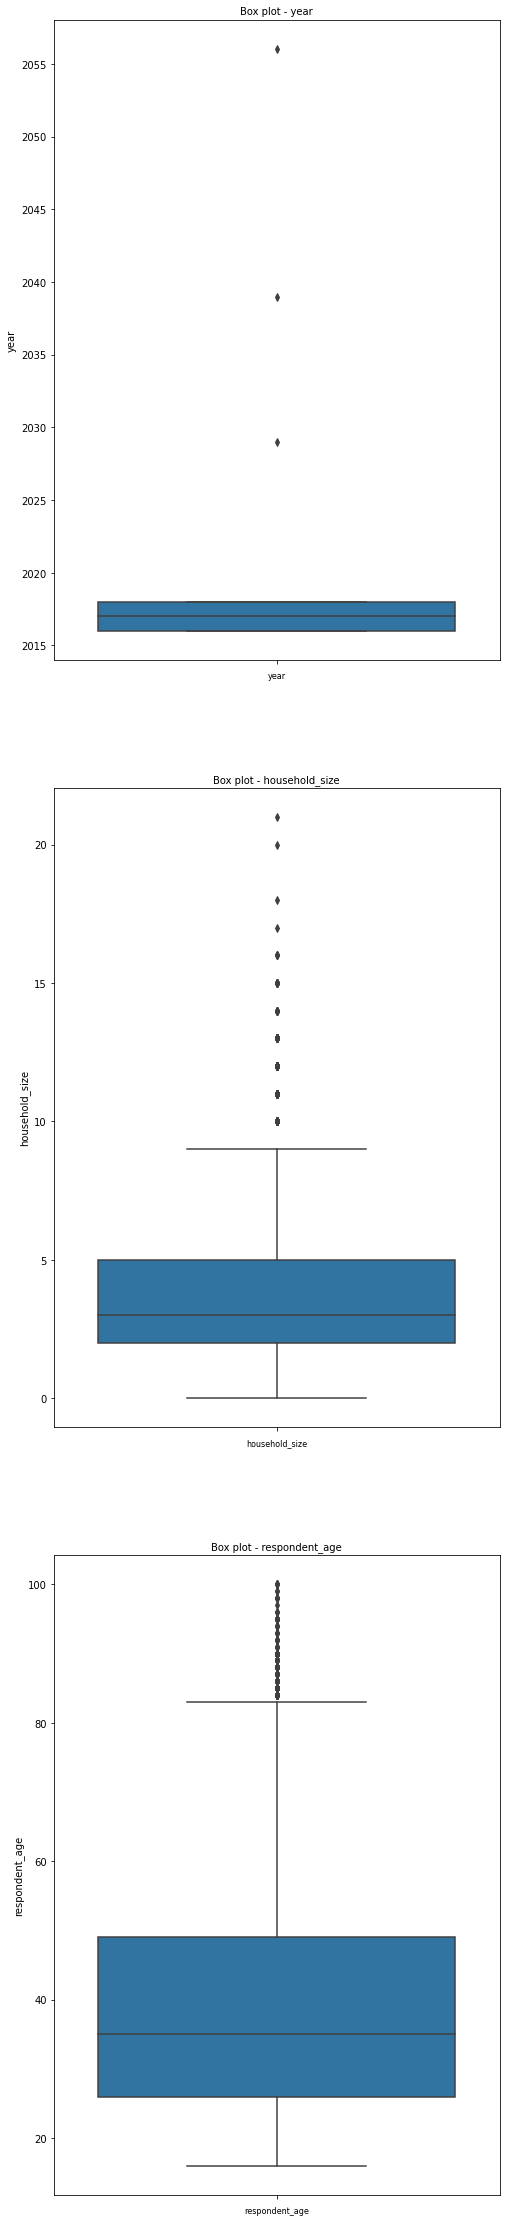

In [19]:
# Box plots to see the outliers

col_names = ['year','household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=fin[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

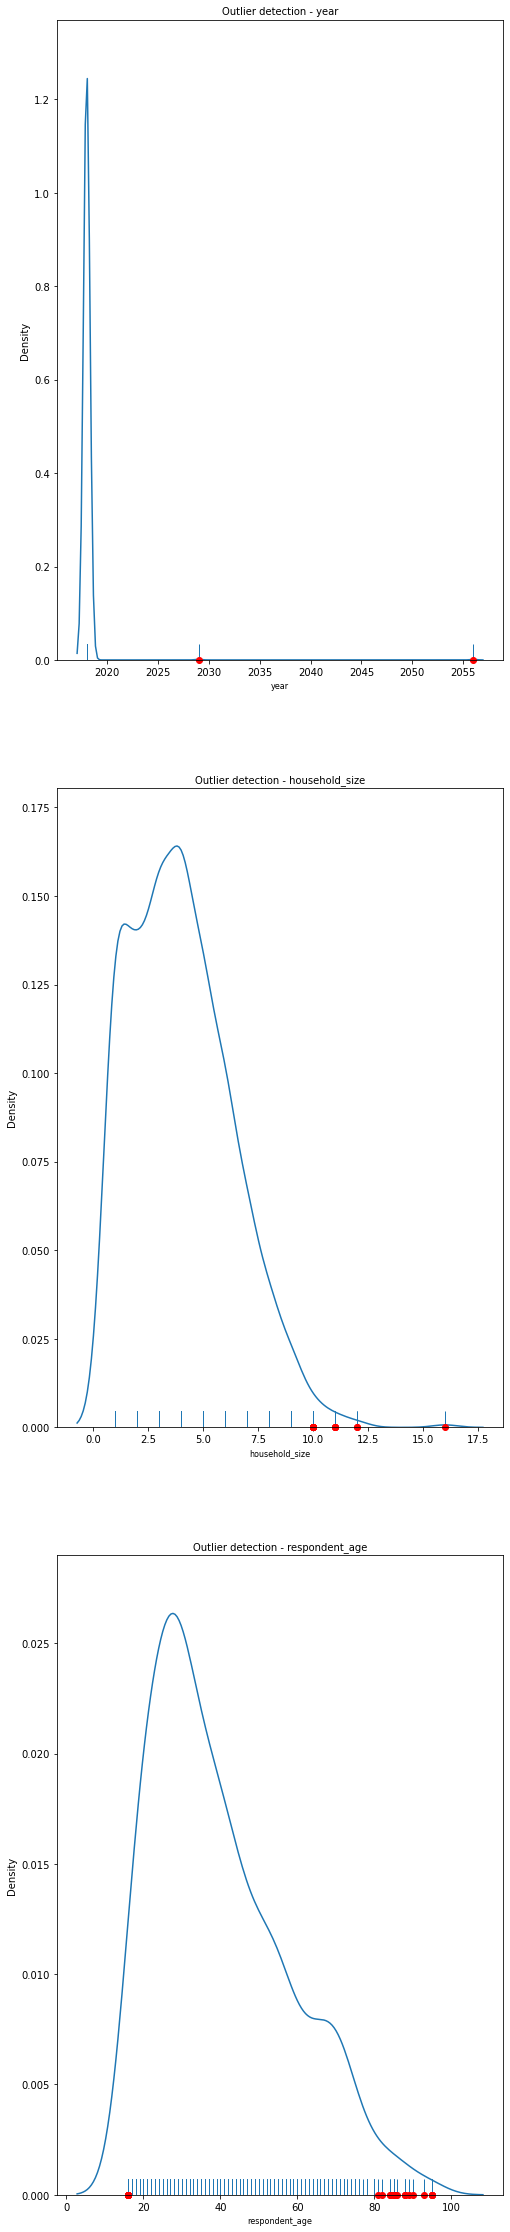

In [20]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['year','household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = fin[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

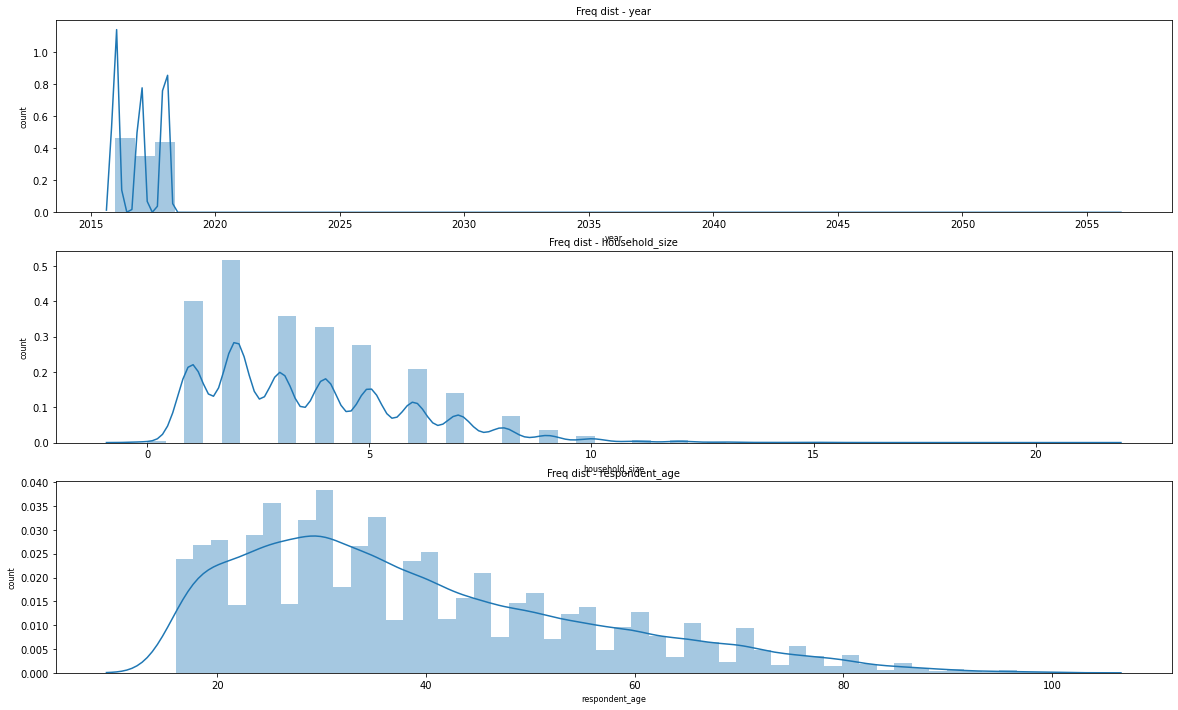

In [21]:
# Ploting the univariate summaries and recording our observations

col_names = ['year','household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(20,12))

for i, col_val in enumerate(col_names):
  
    sns.distplot(fin[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('count',fontsize=8)
    
plt.show()

**Categorical data-country,Has a bank account,Type of location,cell_phone access,Relationship with the head,Marital status,Gender of the Respondent,Cellphone Access,Level of Education,Type of Job**

---



**Country**

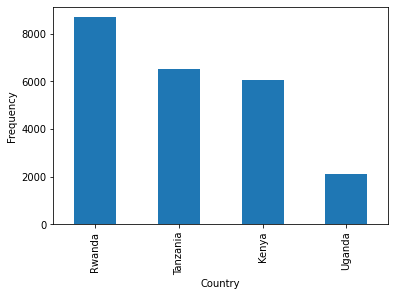

In [22]:
# Frequency Distribution by Country

fin['country'].value_counts().plot.bar()
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()


Data from Rwanda is more and Uganda has the least amount of data.

**Gender of the Respondent**

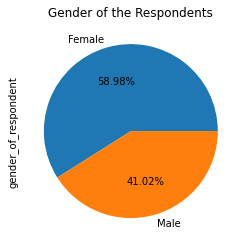

In [23]:
#Chart representation of Gender
fin['gender_of_respondent'].value_counts().plot(kind='pie', autopct='%.2f%%',)

plt.title('Gender of the Respondents')
plt.show()

Majorityof the respondents were females represented by 59%.

**ACCESS TO BANK ACCOUNT**

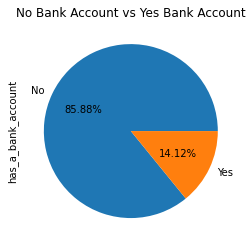

In [24]:
# Number of people having access to bank accounts
fin['has_a_bank_account'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.title('No Bank Account vs Yes Bank Account')
plt.show()

Majority of the people have no bank accounts represented by 85.88%.

**CELL PHONE ACCESS**

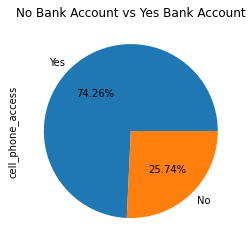

In [25]:
#A chart representation of Access to Cell phone
fin['cell_phone_access'].value_counts().plot(kind='pie', autopct='%.2f%%')

plt.title('No Bank Account vs Yes Bank Account')
plt.show()


Majority of the people had access to cell phones represented by 74.26%

**TYPE OF LOCATION**

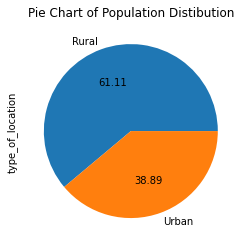

In [26]:
#Chart showing the type of location
fin['type_of_location'].value_counts().plot(kind='pie', autopct='%.2f')

plt.title('Pie Chart of Population Distibution')
plt.show()

Majority of the people represented by 61.1% lived in the Rural.

**MARITAL STATUS**

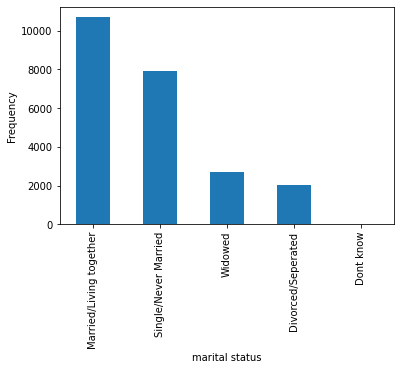

In [27]:
#Bar chart showing the frequency of the marital status
fin['marital_status'].value_counts().plot.bar()
plt.xlabel('marital status')
plt.ylabel('Frequency')
plt.show()

Majority of the respondents were married and lived together.

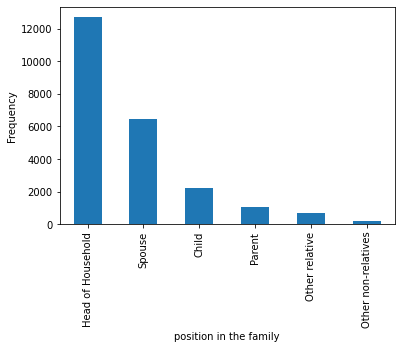

In [28]:
#Bar chart showing frequency of positon one holds in the family
fin['the_relathip_with_head'].value_counts().plot.bar()
plt.xlabel('position in the family')
plt.ylabel('Frequency')
plt.show()

Majority of the respondents were the heads of the household.

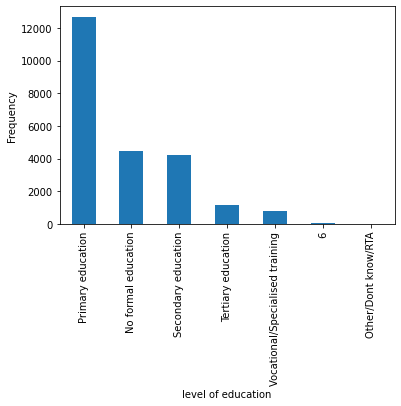

In [29]:
#Bar chart showing the frequency of the level of education
fin['level_of_education'].value_counts().plot.bar()
plt.xlabel('level of education')
plt.ylabel('Frequency')
plt.show()

Majority of the repondents had primary education as the highest level of education

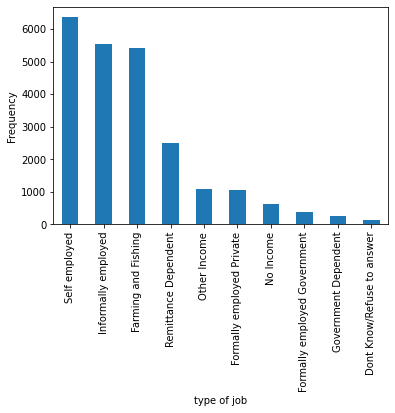

In [30]:
#Bar chart showing the frequencyof type of job
fin['type_of_job'].value_counts().plot.bar()
plt.xlabel('type of job')
plt.ylabel('Frequency')
plt.show()

Majority of the Respondents were Self employed.

#II)Bivariate Analysis

Numeric vs Numeric

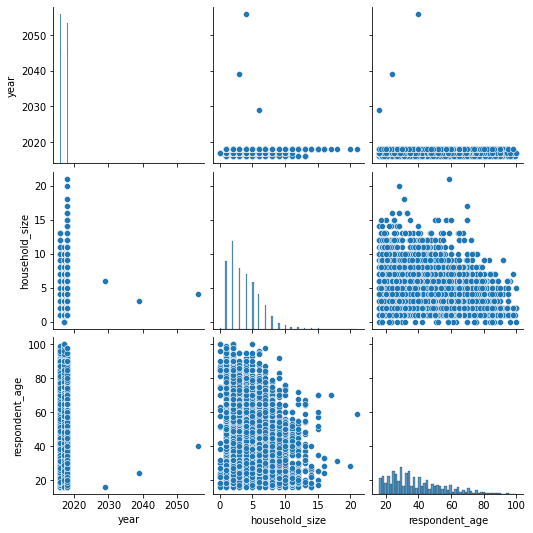

In [31]:
#summary of bivariate analysis 
sns.pairplot(fin)
plt.show()

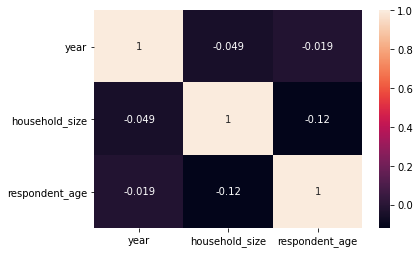

In [32]:
sns.heatmap(fin.corr(),annot=True)
plt.show()

There is a negative weak correlation between the variables.




**CATEGORICAL VS CATEGORICAL**

H0:There is no Association between the variables

H1:There is an Association between thevariables

**Has a bank account vs Type of Location**

In [33]:
# Constructing a chi square

from scipy.stats import chi2_contingency
#has a bank account vs type of location
contigency = pd.crosstab(fin['has_a_bank_account'], fin['type_of_location'] )
contigency

type_of_location,Rural,Urban
has_a_bank_account,,
No,12601,7445
Yes,1663,1634


In [34]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

9.39657913565771e-42


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

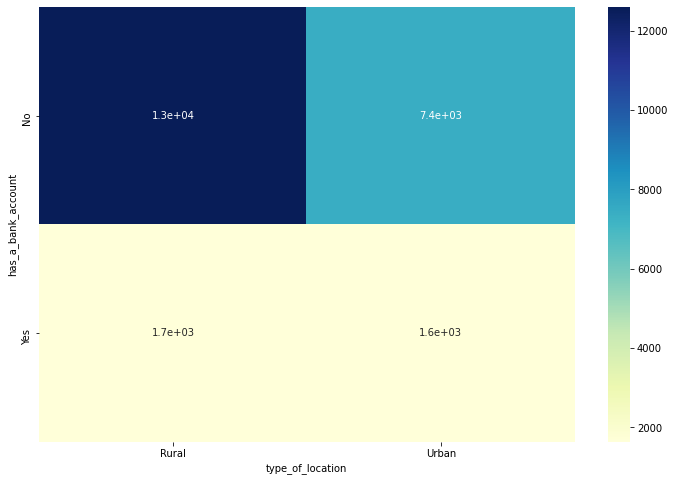

In [35]:
#Heat map representation
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a bank account vs cell phone access**

In [36]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['cell_phone_access'] )
contigency

cell_phone_access,No,Yes
has_a_bank_account,,
No,5905,14141
Yes,104,3193


In [37]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

1.5080056804553143e-224


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

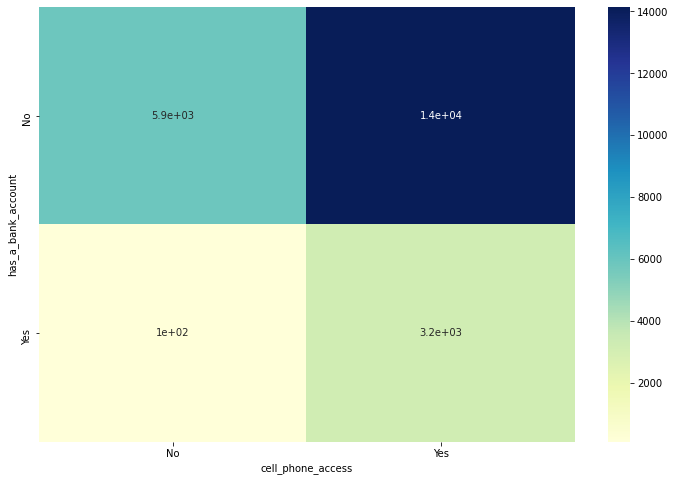

In [38]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a Bank Account vs Gender of Respondent**

In [39]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['gender_of_respondent'] )
contigency


gender_of_respondent,Female,Male
has_a_bank_account,,
No,12287,7759
Yes,1480,1817


In [40]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

2.583833939187575e-70


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

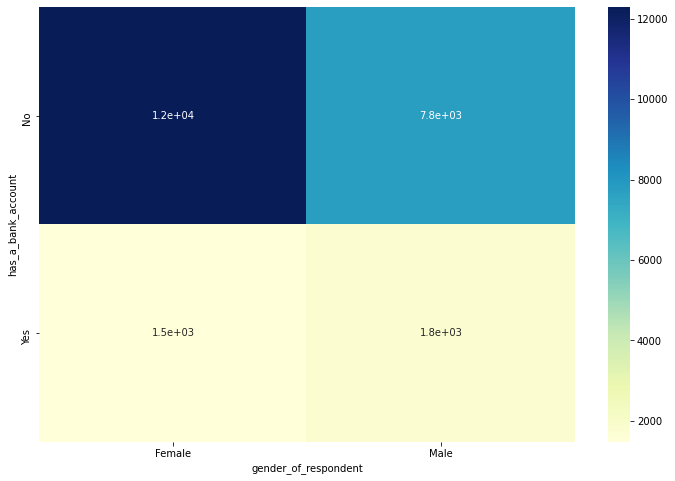

In [41]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a Bank Account vs The Relatoonship Head**

In [42]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['the_relathip_with_head'] )
contigency

the_relathip_with_head,Child,Head of Household,Other non-relatives,Other relative,Parent,Spouse
has_a_bank_account,,,,,,
No,2028,10471,169,598,1004,5776
Yes,193,2259,20,65,65,695


In [43]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

1.8721960503828228e-67


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

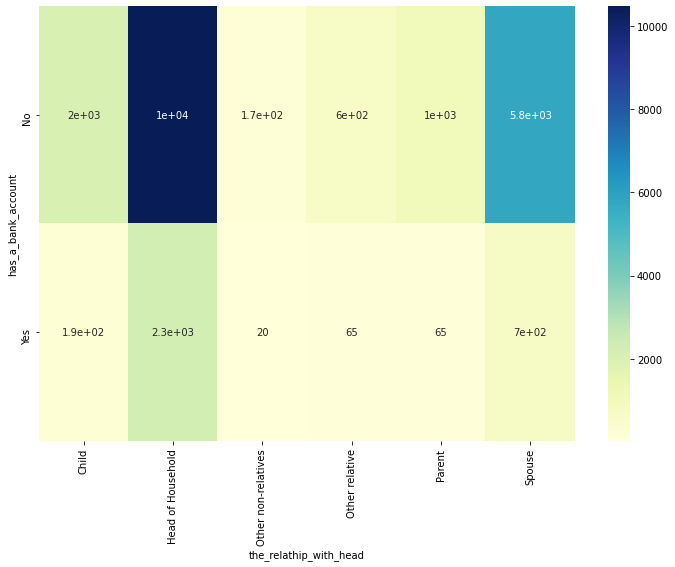

In [44]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a Bank Account vs Maritual Status**

In [45]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['marital_status'] )
contigency

marital_status,Divorced/Seperated,Dont know,Married/Living together,Single/Never Married,Widowed
has_a_bank_account,,,,,
No,1817,6,8839,6944,2440
Yes,232,2,1861,959,243


In [46]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

3.464021133726522e-40


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

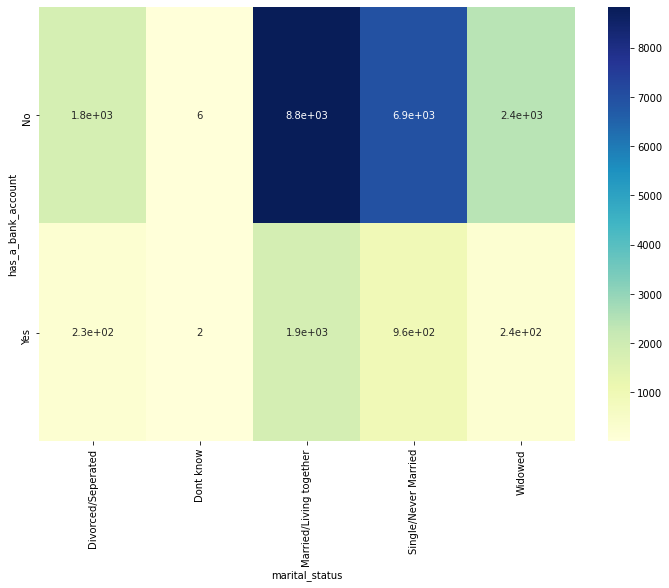

In [47]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a Bank Account vs Level of Education**

In [48]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['level_of_education'] )
contigency

level_of_education,6,No formal education,Other/Dont know/RTA,Primary education,Secondary education,Tertiary education,Vocational/Specialised training
has_a_bank_account,,,,,,,
No,22,4291,2,11606,3226,554,345
Yes,5,176,6,1083,981,590,456


In [49]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

0.0


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

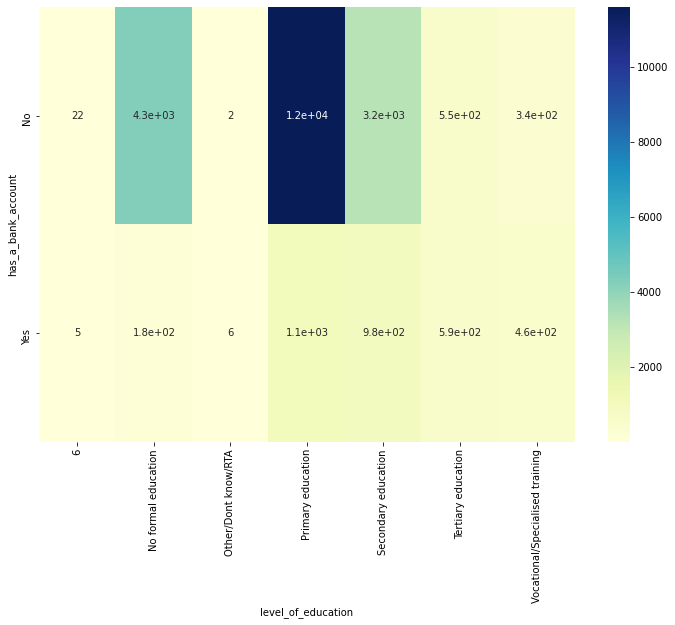

In [50]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

**Has a Bank account vs Type Of Job**

In [51]:
#has a bank account vs cell_phone access
contigency = pd.crosstab(fin['has_a_bank_account'], fin['type_of_job'] )
contigency

type_of_job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
has_a_bank_account,,,,,,,,,,
No,111,4788,87,481,197,5110,605,881,2269,5517
Yes,14,634,299,567,50,440,13,196,240,844


In [52]:
#performing the chi-square test
c, p, dof, expected = chi2_contingency(contigency)
print(p)

0.0


P-value < 0.05 therefore we reject the null hypothesis,thus there is an association between the variables.

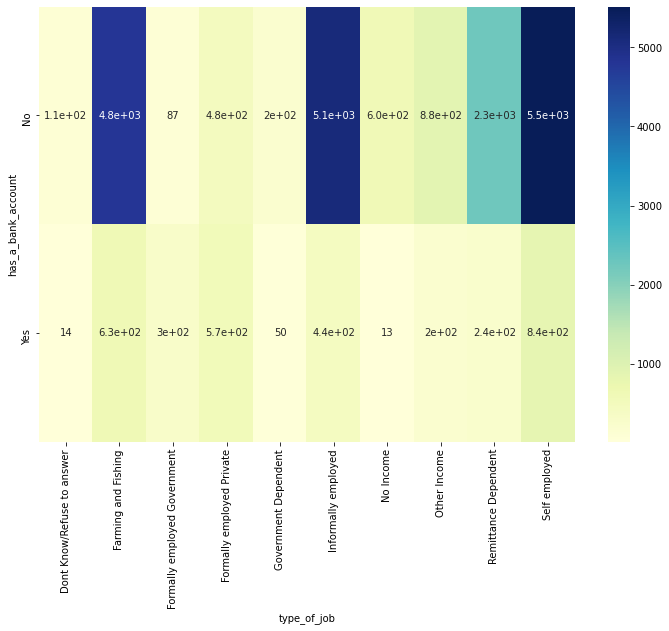

In [53]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

#III)Multivariate Analysis

Principal component



In [54]:
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [55]:
#converting categorical values to numeric
from sklearn.preprocessing import LabelEncoder
# label_encoder.fit(df['col_4'])

# This is how you transform the categories into intergers
# df['col_4'] = label_encoder.transform(df['col_4'])
# cols = ['first_browser', 'gender'] # strings with names

# for name in cols:
#     labelencoder = LabelEncoder()
#     all_labelencoders[name] = labelencoder

#     labelencoder.fit( df[name] )
#     df['labelencoder_' + name] = labelencoder.transform( df[name] )
cols=['country','type_of_location','cell_phone_access','gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_education', 'type_of_job']
for name in cols:
  labelencoder = LabelEncoder()
  
  labelencoder.fit(fin[name])
  fin[name] = labelencoder.transform(fin[name])
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  int64  
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   has_a_bank_account      23343 non-null  object 
 4   type_of_location        23343 non-null  int64  
 5   cell_phone_access       23343 non-null  int64  
 6   household_size          23343 non-null  float64
 7   respondent_age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  int64  
 9   the_relathip_with_head  23343 non-null  int64  
 10  marital_status          23343 non-null  int64  
 11  level_of_education      23343 non-null  int64  
 12  type_of_job             23343 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 2.5+ MB


In [56]:
# Preprocessing

X = fin[['country','type_of_location','cell_phone_access','household_size','respondent_age',
       'gender_of_respondent','the_relathip_with_head','marital_status',
       'level_of_education','type_of_job']]
y = fin['has_a_bank_account']


In [57]:
# Separation

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [60]:
# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1884042 , 0.16445119, 0.15386456, 0.10259927, 0.08379993,
       0.08074941, 0.07184668, 0.0571396 , 0.0539908 , 0.04315435])

In [61]:
# Using one PC

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [62]:
# Training and making Predictions
# Using Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [63]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


the random forest algorithm is able to correctly predict since it has an accuracy of 85.84%.

Factor Analysis

In [64]:
#Using Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

In [65]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(fin)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix

(30493.737024856902, 0.0)

Indicates Factor Analysis is not possible to apply for this dataset.

**Principal Component**

In [66]:
# Preprocessing

x = fin[['country','type_of_location','cell_phone_access','household_size','respondent_age',
       'gender_of_respondent','the_relathip_with_head','marital_status',
       'level_of_education','type_of_job']]
y = fin['has_a_bank_account']


In [67]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
# Step 6: Peforming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [70]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[3934   74]
 [ 511  150]]
Accuracy0.8747055043906619


Using LDA has an higher accuracy of 87.47 compared to use of PCA